In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import yaml

In [2]:
# index = 0
# filename = f"../worlds/farmland_with_walls_{index}.world"
filename = "../worlds/farmland_with_walls.world"

In [3]:
f = open(filename, "w")

TODO: parameterize ground and wall size

In [4]:
with open("../config/default.yaml", 'r') as config_file:
    config_dict = yaml.safe_load(config_file)
    world_size = config_dict["world_size"]
    wall_thickness = config_dict["wall_thickness"]

world_size, wall_thickness

(40.0, 0.15)

In [5]:
f.write(
f"""
<sdf version='1.7'>
<world name='farmland_world'>
  <light name='sun' type='directional'>
    <cast_shadows>1</cast_shadows>
    <pose>0 0 10 0 -0 0</pose>
    <diffuse>0.8 0.8 0.8 1</diffuse>
    <specular>0.2 0.2 0.2 1</specular>
    <attenuation>
      <range>1000</range>
      <constant>0.9</constant>
      <linear>0.01</linear>
      <quadratic>0.001</quadratic>
    </attenuation>
    <direction>-0.5 0.1 -0.9</direction>
    <spot>
      <inner_angle>0</inner_angle>
      <outer_angle>0</outer_angle>
      <falloff>0</falloff>
    </spot>
  </light>
  <gravity>0 0 -9.8</gravity>
  <magnetic_field>6e-06 2.3e-05 -4.2e-05</magnetic_field>
  <atmosphere type='adiabatic'/>
  <physics type='ode'>
    <max_step_size>0.001</max_step_size>
    <real_time_factor>1</real_time_factor>
    <real_time_update_rate>1000</real_time_update_rate>
  </physics>
  <scene>
    <ambient>0.4 0.4 0.4 1</ambient>
    <background>0.7 0.7 0.7 1</background>
    <shadows>1</shadows>
  </scene>
  <wind/>
  <spherical_coordinates>
    <surface_model>EARTH_WGS84</surface_model>
    <latitude_deg>0</latitude_deg>
    <longitude_deg>0</longitude_deg>
    <elevation>0</elevation>
    <heading_deg>0</heading_deg>
  </spherical_coordinates>

  <model name='ground_plane'>
    <static>1</static>
    <link name='link'>
      <collision name='collision'>
        <geometry>
          <plane>
            <normal>0 0 1</normal>
            <size>{world_size} {world_size}</size>
          </plane>
        </geometry>
        <surface>
          <friction>
            <ode>
              <mu>100</mu>
              <mu2>50</mu2>
            </ode>
            <torsional>
              <ode/>
            </torsional>
          </friction>
          <contact>
            <ode/>
          </contact>
          <bounce/>
        </surface>
        <max_contacts>10</max_contacts>
      </collision>
      <visual name='visual'>
        <cast_shadows>0</cast_shadows>
        <geometry>
          <plane>
            <normal>0 0 1</normal>
            <size>{world_size} {world_size}</size>
          </plane>
        </geometry>
        <material>
          <script>
            <uri>file://media/materials/scripts/gazebo.material</uri>
            <name>Gazebo/Grey</name>
          </script>
        </material>
      </visual>
      <self_collide>0</self_collide>
      <enable_wind>0</enable_wind>
      <kinematic>0</kinematic>
    </link>
  </model>

  <model name='Walls'>
    <pose>0 0 0 0 -0 0</pose>
    <link name='Wall_0'>
      <collision name='Wall_0_Collision'>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <pose>0 0 1.25 0 -0 0</pose>
        <max_contacts>10</max_contacts>
        <surface>
          <contact>
            <ode/>
          </contact>
          <bounce/>
          <friction>
            <torsional>
              <ode/>
            </torsional>
            <ode/>
          </friction>
        </surface>
      </collision>
      <visual name='Wall_0_Visual'>
        <pose>0 0 1.25 0 -0 0</pose>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <material>
          <script>
            <uri>file://media/materials/scripts/gazebo.material</uri>
            <name>Gazebo/Grey</name>
          </script>
          <ambient>1 1 1 1</ambient>
        </material>
        <meta>
          <layer>0</layer>
        </meta>
      </visual>
      <pose>-{world_size/2} 0 0 0 -0 1.5708</pose>
      <self_collide>0</self_collide>
      <enable_wind>0</enable_wind>
      <kinematic>0</kinematic>
    </link>
    <link name='Wall_1'>
      <collision name='Wall_1_Collision'>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <pose>0 0 1.25 0 -0 0</pose>
        <max_contacts>10</max_contacts>
        <surface>
          <contact>
            <ode/>
          </contact>
          <bounce/>
          <friction>
            <torsional>
              <ode/>
            </torsional>
            <ode/>
          </friction>
        </surface>
      </collision>
      <visual name='Wall_1_Visual'>
        <pose>0 0 1.25 0 -0 0</pose>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <material>
          <script>
            <uri>file://media/materials/scripts/gazebo.material</uri>
            <name>Gazebo/Grey</name>
          </script>
          <ambient>1 1 1 1</ambient>
        </material>
        <meta>
          <layer>0</layer>
        </meta>
      </visual>
      <pose>0 {world_size/2} 0 0 -0 0</pose>
      <self_collide>0</self_collide>
      <enable_wind>0</enable_wind>
      <kinematic>0</kinematic>
    </link>
    <link name='Wall_2'>
      <collision name='Wall_2_Collision'>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <pose>0 0 1.25 0 -0 0</pose>
        <max_contacts>10</max_contacts>
        <surface>
          <contact>
            <ode/>
          </contact>
          <bounce/>
          <friction>
            <torsional>
              <ode/>
            </torsional>
            <ode/>
          </friction>
        </surface>
      </collision>
      <visual name='Wall_2_Visual'>
        <pose>0 0 1.25 0 -0 0</pose>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <material>
          <script>
            <uri>file://media/materials/scripts/gazebo.material</uri>
            <name>Gazebo/Grey</name>
          </script>
          <ambient>1 1 1 1</ambient>
        </material>
        <meta>
          <layer>0</layer>
        </meta>
      </visual>
      <pose>{world_size/2} 0 0 0 -0 -1.5708</pose>
      <self_collide>0</self_collide>
      <enable_wind>0</enable_wind>
      <kinematic>0</kinematic>
    </link>
    <link name='Wall_3'>
      <collision name='Wall_3_Collision'>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <pose>0 0 1.25 0 -0 0</pose>
        <max_contacts>10</max_contacts>
        <surface>
          <contact>
            <ode/>
          </contact>
          <bounce/>
          <friction>
            <torsional>
              <ode/>
            </torsional>
            <ode/>
          </friction>
        </surface>
      </collision>
      <visual name='Wall_3_Visual'>
        <pose>0 0 1.25 0 -0 0</pose>
        <geometry>
          <box>
            <size>{world_size+wall_thickness} {wall_thickness} 2.5</size>
          </box>
        </geometry>
        <material>
          <script>
            <uri>file://media/materials/scripts/gazebo.material</uri>
            <name>Gazebo/Grey</name>
          </script>
          <ambient>1 1 1 1</ambient>
        </material>
        <meta>
          <layer>0</layer>
        </meta>
      </visual>
      <pose>0 -{world_size/2} 0 0 -0 3.14159</pose>
      <self_collide>0</self_collide>
      <enable_wind>0</enable_wind>
      <kinematic>0</kinematic>
    </link>
    <static>1</static>
  </model>
"""
)

7136

In [6]:
# (x, y) unit in meter
start_points = [
    # [-32.0, -10.0],
    # [-29.0, -10.0],
    [-15.0, -0.0],
    [-12.0, -0.0],
    [-9.0,  -0.0],

    # [-30.0, -40.0],
    # [-30.0, -35.0],
    [-15.0, -15.0],
    [-15.0, -10.0],
    [-15.0, -5.0],


    [-5.0, 10.0],
    [-4.0, 11.0],
    [-3.0, 12.0],
    [-2.0, 13.0],
    [-1.0, 14.0],
    [0.0, 15.0],
    [-4.67, 10.33],
    [-4.33, 10.67],
    [-3.67, 11.33],
    [-3.33, 11.67],
    [-1.67, 13.33],
    [-1.33, 13.67],
    [-0.67, 14.33],
    [-0.33, 14.67],
    

    [5.0, -17.0],
    [5.33, -17.0],
    [5.67, -17.0],
    [6.0, -17.0],
    [6.33, -17.0],
    [6.67, -17.0],
    [7.0, -17.0],
    [7.33, -17.0],
    [7.67, -17.0],

    [9.0, -17.0],
    [9.33, -17.0],
    [9.67, -17.0],
    [10.0, -17.0],
    [10.33, -17.0],
    [10.67, -17.0],
    [11.0, -17.0],
    [11.33, -17.0],
    [11.67, -17.0],

    [13.0, -17.0],
    [13.33, -17.0],
    [13.67, -17.0],
    [14.0, -17.0],
    [14.33, -17.0],
    [14.67, -17.0],
    [15.0, -17.0],
    [15.33, -17.0],
    [15.67, -17.0],


    [-3.0, 0.0],
]
end_points = [
    # [-32.0, 25.0],
    # [-29.0, 25.0],
    [-15.0, 16.0],
    [-12.0, 16.0],
    [-9.0,  16.0],

    # [30.0, -40.0],
    # [30.0, -35.0],
    [0.0, -15.0],
    [0.0, -10.0],
    [0.0, -5.0],

    [5.0, 0.0],
    [6.0, 1.0],
    [7.0, 2.0],
    [8.0, 3.0],
    [9.0, 4.0],
    [10.0, 5.0],
    [5.33, 0.33],
    [5.67, 0.67],
    [6.33, 1.33],
    [6.67, 1.67],
    [8.33, 3.33],
    [8.67, 3.67],
    [9.33, 4.33],
    [9.67, 4.67],


    [5.0, -2.0],
    [5.33, -2.0],
    [5.67, -2.0],
    [6.0, -2.0],
    [6.33, -2.0],
    [6.67, -2.0],
    [7.0, -2.0],
    [7.33, -2.0],
    [7.67, -2.0],

    [9.0, -2.0],
    [9.33, -2.0],
    [9.67, -2.0],
    [10.0, -2.0],
    [10.33, -2.0],
    [10.67, -2.0],
    [11.0, -2.0],
    [11.33, -2.0],
    [11.67, -2.0],

    [13.0, -2.0],
    [13.33, -2.0],
    [13.67, -2.0],
    [14.0, -2.0],
    [14.33, -2.0],
    [14.67, -2.0],
    [15.0, -2.0],
    [15.33, -2.0],
    [15.67, -2.0],


    [-3.0, 0.0],
]
num_trees = [
    # 20, 
    # 20,
    10,
    10,
    10,

    # 15, 
    # 15, 
    4, 
    4, 
    4, 
] + [40]*(14+9) + [30]*27 + [1]
# 0 for birch tree, 1 for lemon tree, 2 for corn
tree_type = [
    # 0, 
    # 0,
    0,
    0,
    0,

    # 1,
    # 1,
    1,
    1,
    1,
] + [2]*(14) + [3]*27 + [4]
# unit in meter
random_radius = [
    # 0.3, 
    # 0.3,
    0.3,
    0.3,
    0.3,

    # 0.5,
    # 0.5,
    0.5,
    0.5,
    0.5,
] + [0.05]*(14+27) + [0.0]

start_points = np.array(start_points)
end_points = np.array(end_points)

(-20.0, 20.0)

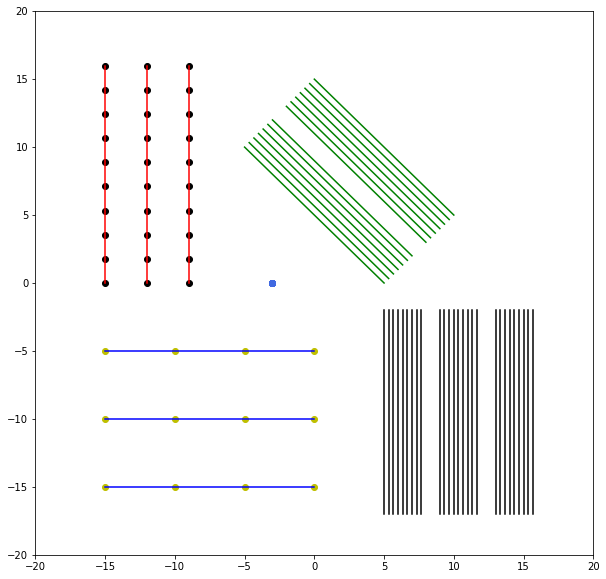

In [7]:
plt.figure(figsize=(10,10))

colors = ["r", "b", "g", "k", "y", "m", "c", "royalblue", "grey", "tomato"]

for i in range(len(start_points)):
    plt.plot([start_points[i,0], end_points[i,0]], [start_points[i,1], end_points[i,1]], c = colors[tree_type[i]])
    
    if tree_type[i] not in [2, 3]:
        alphas = np.linspace(0, 1, num_trees[i])
        for alpha in alphas:
            tree_point = start_points[i]*alpha + end_points[i]*(1-alpha)
            plt.scatter(tree_point[0], tree_point[1], c = colors[tree_type[i]+3])
    

plt.xlim(-world_size/2, world_size/2)
plt.ylim(-world_size/2, world_size/2)

In [8]:
model_paths = [
    "Birch_tree/birch_tree_5p.obj",
    "Lemon_tree/lemon_tree_10p.obj",
    "Corn/corn_5p.obj",
    "Corn_low_poly/corn.obj",
    "Tractor/tractor.obj"
]

tree_counter = defaultdict(lambda: 0)

for i in range(len(start_points)):
    alphas = np.linspace(0, 1, num_trees[i])

    yaw = 0
    if tree_type[i] == 1:
        yaw = np.pi/2

    for alpha in alphas:
        tree_point = start_points[i]*alpha + end_points[i]*(1-alpha)
        tree_point += random_radius[i] * (np.random.rand(2,) * 2.0 - 1.0)
        f.write(
f"""
    <model name='tree_{tree_type[i]}_{tree_counter[tree_type[i]]}'>
        <static>1</static>
        <link name='link'>
        <collision name='collision'>
            <geometry>
            <mesh>
                <uri>model://{model_paths[tree_type[i]]}</uri>
                <scale>1 1 1</scale>
            </mesh>
            </geometry>
            <surface>
            <friction>
                <ode>
                <mu>100</mu>
                <mu2>50</mu2>
                </ode>
                <torsional>
                <ode/>
                </torsional>
            </friction>
            <contact>
                <ode/>
            </contact>
            <bounce/>
            </surface>
            <max_contacts>10</max_contacts>
        </collision>
        <visual name='visual'>
            <geometry>
            <mesh>
                <uri>model://{model_paths[tree_type[i]]}</uri>
                <scale>1 1 1</scale>
            </mesh>
            </geometry>
        </visual>
        <self_collide>0</self_collide>
        <enable_wind>0</enable_wind>
        <kinematic>0</kinematic>
        </link>
        <pose>{tree_point[0]} {tree_point[1]} 0 0 0 {yaw} </pose>
    </model>
"""
        )
        
        tree_counter[tree_type[i]] += 1

In [9]:
f.write(
"""
  </world>
</sdf>
"""
)

19

In [10]:
f.close()

In [11]:
# # (x, y) unit in meter
# start_points = [
#     # [-32.0, -10.0],
#     # [-29.0, -10.0],
#     [-15.0, -0.0],
#     [-12.0, -0.0],
#     [-9.0,  -0.0],

#     # [-30.0, -40.0],
#     # [-30.0, -35.0],
#     [-15.0, -15.0],
#     [-15.0, -10.0],
#     [-15.0, -5.0],

#     # [10.0, -10.0],
#     # # [9.5, -9.5],
#     # [7.5, -7.5],
#     # # [7.0, -7.0],
#     # [5.0, -5.0],
#     # # [4.5, -4.5],
#     # [2.5, -2.5],
#     # # [2.0, -2.0],
#     # [0.0, 0.0],
#     # # [-0.5, 0.5],
#     # [-2.5, 2.5],
#     # # [-3.0, 3.0],
#     # [-5.0, 5.0],
#     # # [-5.5, 5.5],
#     # [-7.5, 7.5],
#     # # [-8.0, 8.0],
#     # [-10.0, 10.0],
#     # # [-10.5, 10.5],
#     # [-12.5, 12.5],
#     # # [-13.0, 13.0],
#     # [-15.0, 15.0],
#     # # [-15.5, 15.5],
#     [-5.0, 10.0],
#     [-4.0, 11.0],
#     [-3.0, 12.0],
#     [-2.0, 13.0],
#     [-1.0, 14.0],
#     [0.0, 15.0],
#     # [-4.0, 16.0],
#     # [-3.0, 17.0],
#     # [-2.0, 18.0],
#     # [-1.0, 19.0],
#     # [0.0, 20.0],
# ]
# end_points = [
#     # [-32.0, 25.0],
#     # [-29.0, 25.0],
#     [-15.0, 16.0],
#     [-12.0, 16.0],
#     [-9.0,  16.0],

#     # [30.0, -40.0],
#     # [30.0, -35.0],
#     [15.0, -15.0],
#     [15.0, -10.0],
#     [15.0, -5.0],

#     # [40.0, 20.0],
#     # # [39.5, 20.5],
#     # [37.5, 22.5],
#     # # [37.0, 23.0],
#     # [35.0, 25.0],
#     # # [34.5, 25.5],
#     # [32.5, 27.5],
#     # # [32.0, 28.0],
#     # [30.0, 30.0],
#     # # [29.5, 30.5],
#     # [27.5, 32.5],
#     # # [27.0, 33.0],
#     # [25.0, 35.0],
#     # # [24.5, 35.5],
#     # [22.5, 37.5],
#     # # [22.0, 38.0],
#     # [20.0, 40.0],
#     # # [19.5, 40.5],
#     # [17.5, 42.5],
#     # # [17.0, 43.0],
#     # [15.0, 45.0],
#     # # [14.5, 45.5],
#     [5.0, 0.0],
#     [6.0, 1.0],
#     [7.0, 2.0],
#     [8.0, 3.0],
#     [9.0, 4.0],
#     [10.0, 5.0],
#     # [16.0, -4.0],
#     # [17.0, -3.0],
#     # [18.0, -2.0],
#     # [19.0, -1.0],
#     # [20.0, 0.0],
# ]
# num_trees = [
#     # 20, 
#     # 20,
#     10,
#     10,
#     10,

#     # 15, 
#     # 15, 
#     7, 
#     7, 
#     7, 

#     40,
#     # 100,
#     40,
#     # 100,
#     40,
#     # 100,
#     40,
#     # 100,
#     40,
#     # 100,    
#     40,
#     # 100,
#     # 40,
#     # # 100,
#     # 40,
#     # # 100,
#     # 40,
#     # # 100,
#     # 40,
#     # # 100,
#     # 40,
#     # # 100,
# ]
# # 0 for birch tree, 1 for lemon tree, 2 for corn
# tree_type = [
#     # 0, 
#     # 0,
#     0,
#     0,
#     0,

#     # 1,
#     # 1,
#     1,
#     1,
#     1,

#     2,
#     # 2,
#     2,
#     # 2,
#     2,
#     # 2,
#     2,
#     # 2,
#     2,
#     # 2,
#     2,
#     # # 2,
#     # 2,
#     # # 2,
#     # 2,
#     # # 2,
#     # 2,
#     # # 2,
#     # 2,
#     # # 2,
#     # 2,
#     # # 2,
# ]
# # unit in meter
# random_radius = [
#     # 0.3, 
#     # 0.3,
#     0.3,
#     0.3,
#     0.3,

#     # 0.5,
#     # 0.5,
#     0.5,
#     0.5,
#     0.5,

#     0.05,
#     # 0.05,
#     0.05,
#     # 0.05,
#     0.05,
#     # 0.05,
#     0.05,
#     # 0.05,
#     0.05,
#     # 0.05,
#     0.05,
#     # 0.05,
#     # 0.05,
#     # # 0.05,
#     # 0.05,
#     # # 0.05,
#     # 0.05,
#     # # 0.05,
#     # 0.05,
#     # # 0.05,
#     # 0.05,
#     # # 0.05,
# ]

# start_points = np.array(start_points)
# end_points = np.array(end_points)